# Task 2 : To Explore Supervised Machine Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Reading the CSV file 

In [2]:
 url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")


s_data

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [4]:
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Plotting the distribution of scores 

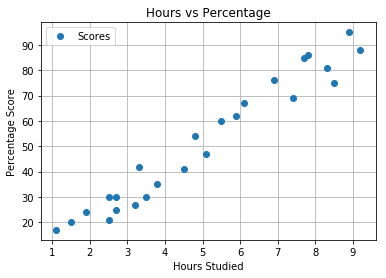

In [5]:
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.grid()
plt.show()

## Preparing the data

In [6]:
X = s_data.iloc[:, :-1].values 
y = s_data.iloc[:, 1].values  
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [7]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

## Training and Testing

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
from sklearn.linear_model import LinearRegression
Lr=LinearRegression()
Lr.fit(X_train, y_train)
print("Training Completed")

Training Completed


## Plotting the trained model 

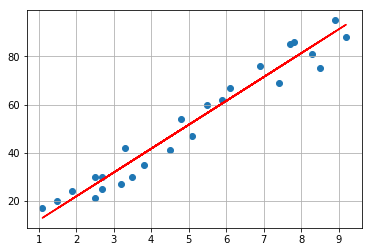

In [10]:
line = Lr.coef_*X+Lr.intercept_
plt.scatter(X, y)
plt.plot(X, line,color="red");
plt.grid()
plt.show()

## Making Predictions

In [11]:
print("m - ", Lr.coef_,"\nc -", Lr.intercept_ )

m -  [9.91065648] 
c - 2.018160041434683


## Use Test Data(X_test) to test the model

In [12]:
y_pred=Lr.predict(X_test)

print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


## Compare with the actual Data outputs(y_test)

In [13]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Plot the line on test data

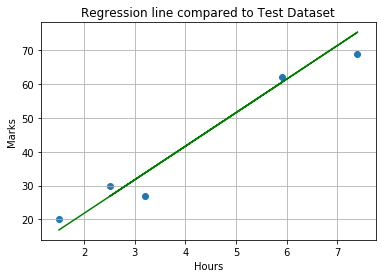

In [14]:
plt.plot(X_test,y_pred,color="green")
plt.scatter(X_test,y_test,marker="o")
plt.xlabel("Hours")
plt.ylabel("Marks")
plt.title("Regression line compared to Test Dataset")
plt.grid()
plt.show()

# Prediction

In [15]:
hours = [[9.25],[10]]
Score = Lr.predict(hours)
Score

array([ 93.69173249, 101.12472485])

## Evaluating the model

In [16]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', 
      metrics.mean_squared_error(y_test, y_pred)) 
print('Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Mean Squared Error: 4.6474476121003665
